In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.core.computation.check import NUMEXPR_INSTALLED

 **To input sleep health data**

In [38]:
data= pd.read_csv(r"C:\Users\parig\OneDrive\Desktop\NITW\interns 25\p project\sleep.csv")

In [39]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,NaN
2,Male,28,Doctor,6.2,6,65,8,Normal,125/80,75,NaN
3,Male,28,Sales Representative,5.9,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,Sleep Apnea


In [40]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.147059,5.387701,70.165775
std,8.673133,0.795657,1.196956,20.928252,1.774698,4.135676
min,27.000000,5.800000,4.000000,28.000000,3.000000,65.000000
25%,35.250000,6.400000,6.000000,44.000000,4.000000,68.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000
max,59.000000,8.500000,9.000000,94.000000,8.000000,86.000000


In [41]:
data.shape

(374, 11)

**to check for missing values**

In [42]:
data.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Sleep Disorder             219
dtype: int64

since sleep disorder has 219 missing values, indicating that 219 people do not have any disorders. 

So, replacing all the missing values with **'Normal'**


In [43]:
data['Sleep Disorder'].fillna('Normal',inplace=True)

In [44]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,Normal
2,Male,28,Doctor,6.2,6,65,8,Normal,125/80,75,Normal
3,Male,28,Sales Representative,5.9,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,Sleep Apnea


In [45]:
data.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Sleep Disorder             0
dtype: int64

no missing values

In [46]:
data.duplicated().sum()

70

In [47]:
df=data.drop_duplicates(keep='last')

In [48]:
df.shape

(304, 11)

In [49]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,Normal
2,Male,28,Doctor,6.2,6,65,8,Normal,125/80,75,Normal
3,Male,28,Sales Representative,5.9,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,76,3,Overweight,140/95,68,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,Sleep Apnea
372,Female,59,Nurse,8.1,9,77,3,Overweight,140/95,68,Sleep Apnea


to check number of unique values in each coloumn

In [51]:
df.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    46
Stress Level                6
BMI Category                4
Blood Pressure             27
Heart Rate                 19
Sleep Disorder              3
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   304 non-null    object 
 1   Age                      304 non-null    int64  
 2   Occupation               304 non-null    object 
 3   Sleep Duration           304 non-null    float64
 4   Quality of Sleep         304 non-null    int64  
 5   Physical Activity Level  304 non-null    int64  
 6   Stress Level             304 non-null    int64  
 7   BMI Category             304 non-null    object 
 8   Blood Pressure           304 non-null    object 
 9   Heart Rate               304 non-null    int64  
 10  Sleep Disorder           304 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 28.5+ KB


**EXPLORING DATA**

In [54]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,Normal
2,Male,28,Doctor,6.2,6,65,8,Normal,125/80,75,Normal
3,Male,28,Sales Representative,5.9,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,Sleep Apnea


In [56]:
num = [feature for feature in df.columns if df[feature].dtype != 'O']
cat= [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num), num))
print('\nWe have {} categorical features : {}'.format(len(cat), cat))

We have 6 numerical features : ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']

We have 5 categorical features : ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [57]:
print("Categories in 'Gender' variable: ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Occupation' variable: ",end=" ")
print(df['Occupation'].unique())

print("Categories in'BMI Category' variable:",end=" " )
print(df['BMI Category'].unique())

print("Categories in 'Blood Pressure' variable: ",end=" " )
print(df['Blood Pressure'].unique())

print("Categories in 'Sleep Disorder' variable: ",end=" " )
print(df['Sleep Disorder'].unique())

Categories in 'Gender' variable:  ['Male' 'Female']
Categories in 'Occupation' variable:  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Categories in'BMI Category' variable: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Categories in 'Blood Pressure' variable:  ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '114/75'
 '115/78' '119/77' '121/79' '125/82' '135/90' '122/80' '134/90' '140/95'
 '142/92' '139/91' '118/75']
Categories in 'Sleep Disorder' variable:  ['Normal' 'Sleep Apnea' 'Insomnia']


In [119]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

<ipython-input-119-76748243e5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')


In [120]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [145]:
df.to_csv('cleaned_sleep.csv', index=False)

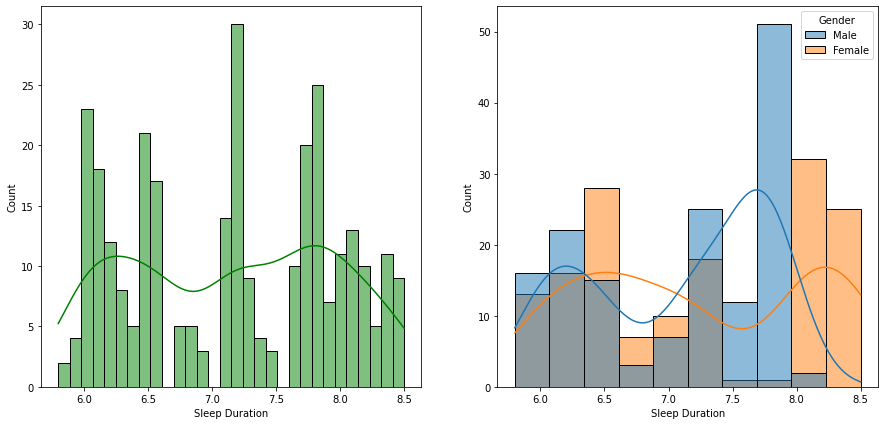

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Sleep Duration',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Sleep Duration',kde=True,hue='Gender')
plt.show()

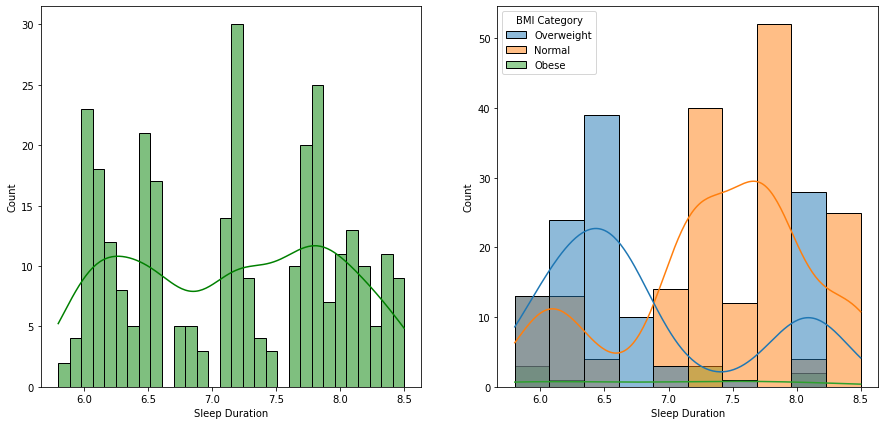

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Sleep Duration',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Sleep Duration',kde=True,hue='BMI Category')
plt.show()

**INSIGHTS**

- people who are over weight also sleep for less amount of time


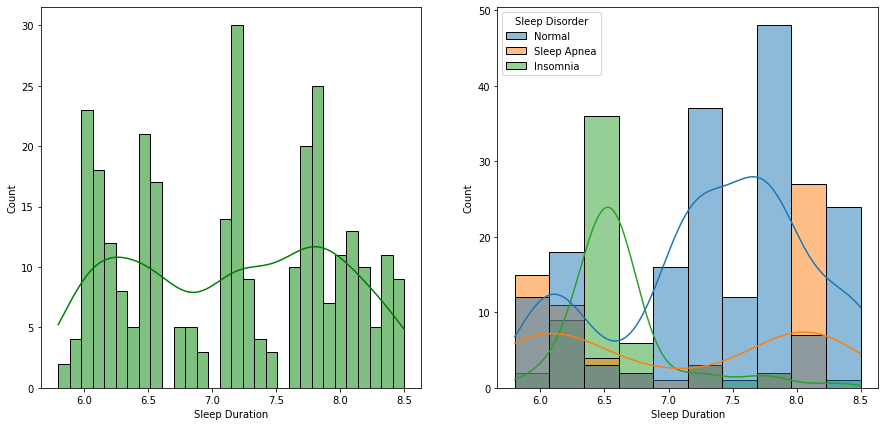

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Sleep Duration',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Sleep Duration',kde=True,hue='Sleep Disorder')
plt.show()

**INSIGHTS**

- people suffering from insomnia have lower sleep duration than normal people and those people suffering from sleep apnea have variable sleep distribution

**BASED ON OCCUPATION**

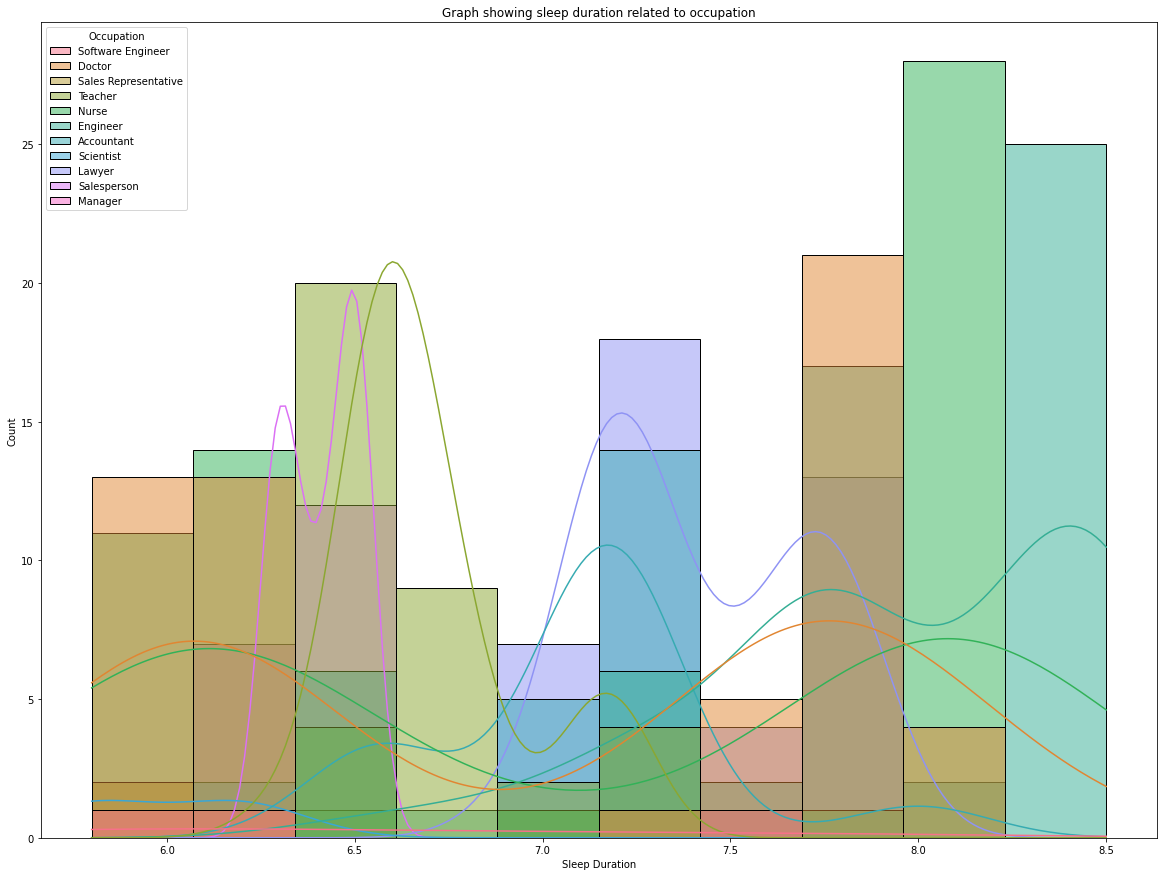

In [124]:
plt.figure(figsize=(20,15))
sns.histplot(data=df,x='Sleep Duration',kde=True,hue='Occupation')
plt.title("Graph showing sleep duration related to occupation")
plt.show()

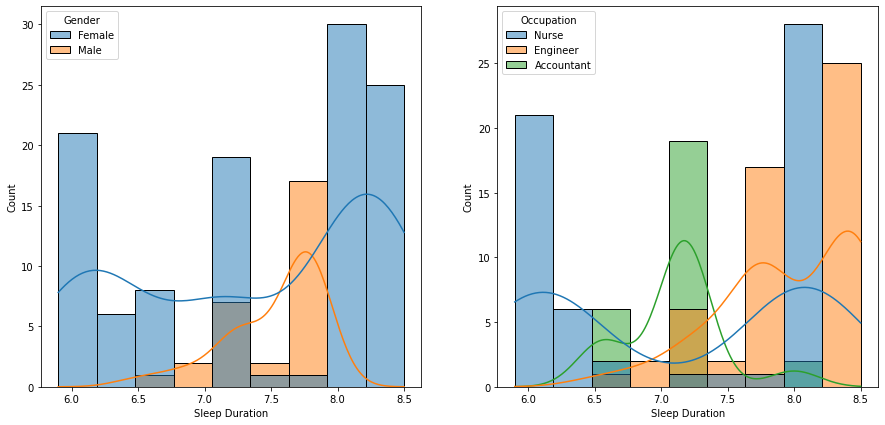

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df[(df.Occupation=='Accountant')|(df.Occupation=='Engineer')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Gender')
plt.subplot(122)
sns.histplot(data=df[(df.Occupation=='Accountant')|(df.Occupation=='Engineer')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Occupation')
plt.show()

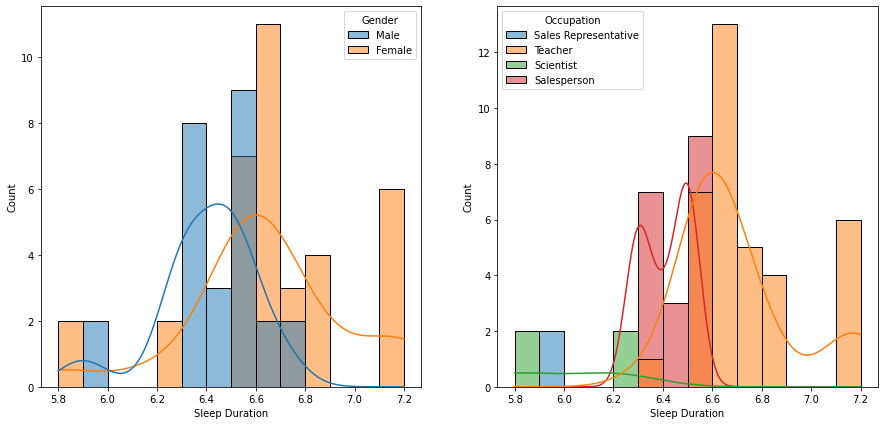

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df[(df.Occupation=='Teacher')|(df.Occupation=='Scientist')|(df.Occupation=='Sales Representative')|(df.Occupation=='Salesperson') ],x='Sleep Duration',kde=True,hue='Gender')
plt.subplot(122)
sns.histplot(data=df[(df.Occupation=='Teacher')|(df.Occupation=='Scientist')|(df.Occupation=='Sales Representative')|(df.Occupation=='Salesperson')  ],x='Sleep Duration',kde=True,hue='Occupation')
plt.show()

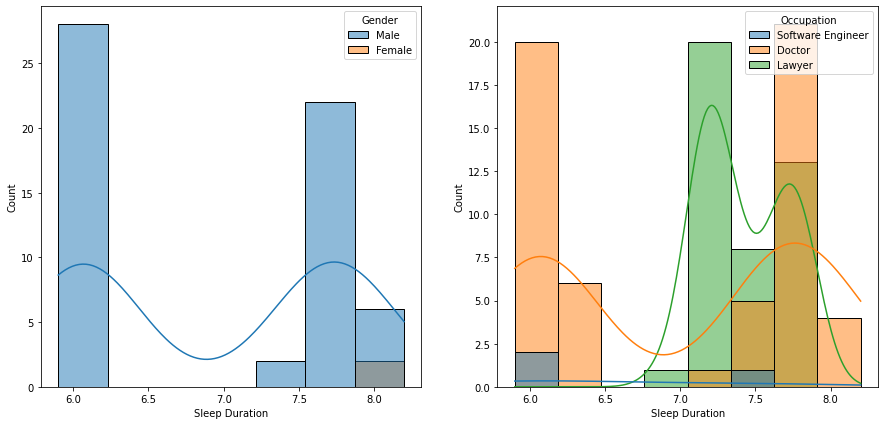

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Software Engineer')|(df.Occupation=='Lawywer') ],x='Sleep Duration',kde=True,hue='Gender')
plt.subplot(122)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Software Engineer')|(df.Occupation=='Lawyer') ],x='Sleep Duration',kde=True,hue='Occupation')
plt.show()

<ipython-input-128-b17515bc02a8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-128-b17515bc02a8>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-128-b17515bc02a8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


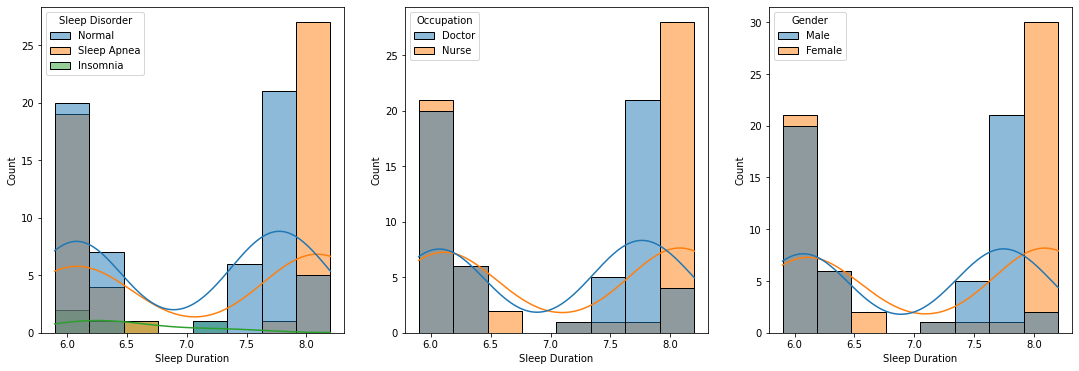

In [128]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Sleep Disorder')
plt.subplot(142)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Occupation')
plt.subplot(143)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Gender')
plt.show()

<ipython-input-129-45c48703e308>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-129-45c48703e308>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-129-45c48703e308>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


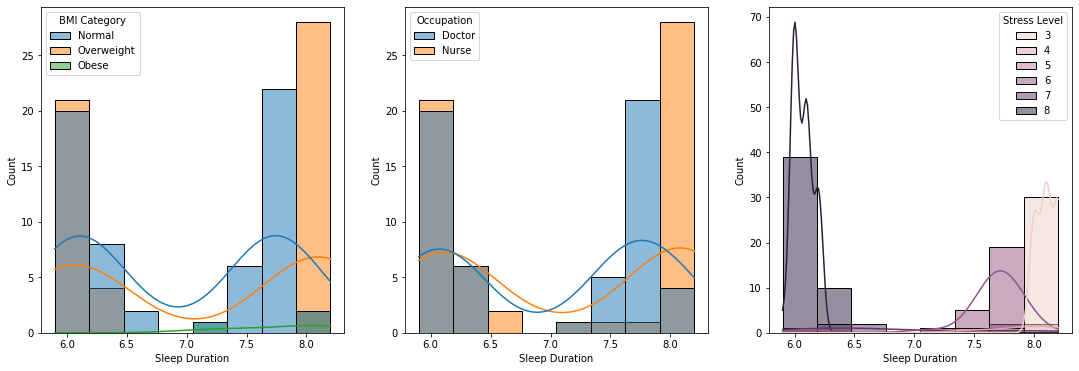

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='BMI Category')
plt.subplot(142)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Occupation')
plt.subplot(143)
sns.histplot(data=df[(df.Occupation=='Doctor')|(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Stress Level')
plt.show()

NURSE

<ipython-input-130-ccf3fc64273d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-130-ccf3fc64273d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-130-ccf3fc64273d>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


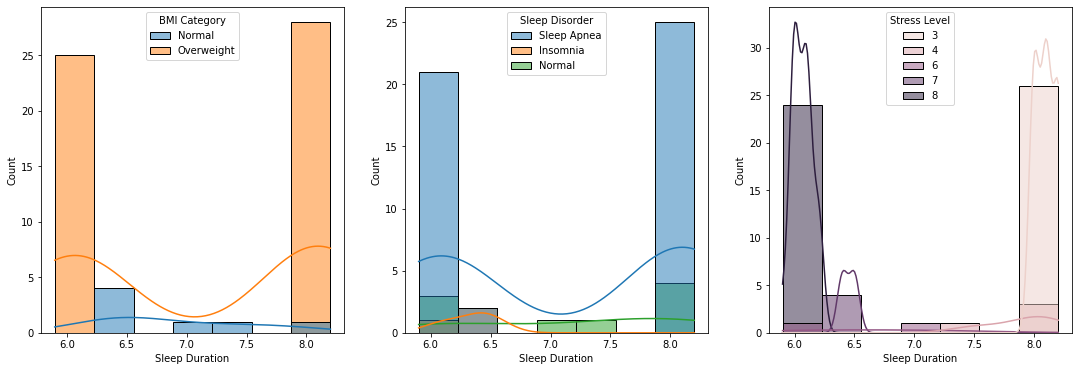

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df[(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='BMI Category')
plt.subplot(142)
sns.histplot(data=df[(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Sleep Disorder')
plt.subplot(143)
sns.histplot(data=df[(df.Occupation=='Nurse') ],x='Sleep Duration',kde=True,hue='Stress Level')
plt.show()

DOCTOR

<ipython-input-131-a515b01c4bd6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-131-a515b01c4bd6>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-131-a515b01c4bd6>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


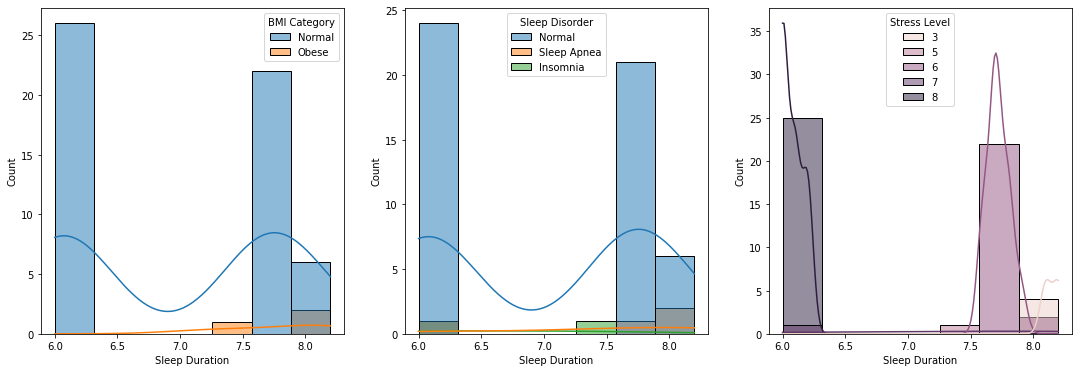

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df[(df.Occupation=='Doctor')],x='Sleep Duration',kde=True,hue='BMI Category')
plt.subplot(142)
sns.histplot(data=df[(df.Occupation=='Doctor')],x='Sleep Duration',kde=True,hue='Sleep Disorder')
plt.subplot(143)
sns.histplot(data=df[(df.Occupation=='Doctor')],x='Sleep Duration',kde=True,hue='Stress Level')
plt.show()

**INSIGHTS**

- Scientists, Sales Representatives and Software Engineers sleep for less amount of time 

- Teacher, Lawyer and Engineer sleep generally better

- Doctors and nurses have sleep duration on exteme ends of the spectrum. Nurses in this data are female whereas doctors are male. doctors and nurses who sleep less all have 7+ levels of stress indicting they work in an extremely stressful environment.

- Nurses who sleep more have Sleep apnea and are overweight but stress levels are significantly less. 
- Nurses who sleep less are also overweight having sleep apnea and insomnia.

- stress level for doctors who sleep well is maintained in the middle as they are of normal weight without any sleeping disorders.


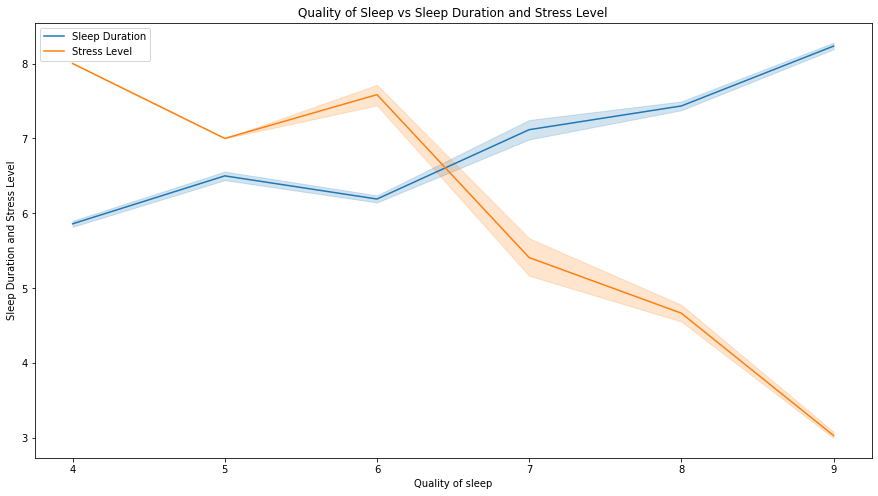

In [132]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['Quality of Sleep'],y=df['Sleep Duration'],label="Sleep Duration")
sns.lineplot(x=df['Quality of Sleep'],y=df['Stress Level'], label="Stress Level")
plt.ylabel('Sleep Duration and Stress Level')
plt.xlabel('Quality of sleep')
plt.title('Quality of Sleep vs Sleep Duration and Stress Level')
plt.legend()
plt.show()

**INSIGHTS**
- Quality of sleep increases as duration also increases, making them directly proportional to each other
- higher stress levels result in lower quality of sleep

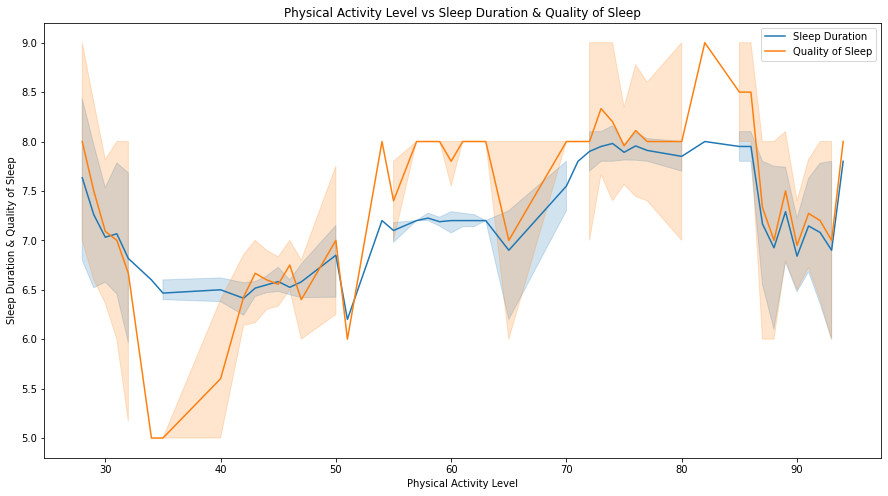

In [133]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['Physical Activity Level'],y=df['Sleep Duration'],label="Sleep Duration")
sns.lineplot(x=df['Physical Activity Level'],y=df['Quality of Sleep'], label="Quality of Sleep")
plt.ylabel('Sleep Duration & Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.title('Physical Activity Level vs Sleep Duration & Quality of Sleep')
plt.legend()
plt.show()

**INSIGHTS**
- quality of sleep and sleep duration are generally better for people with higher physical level of activity


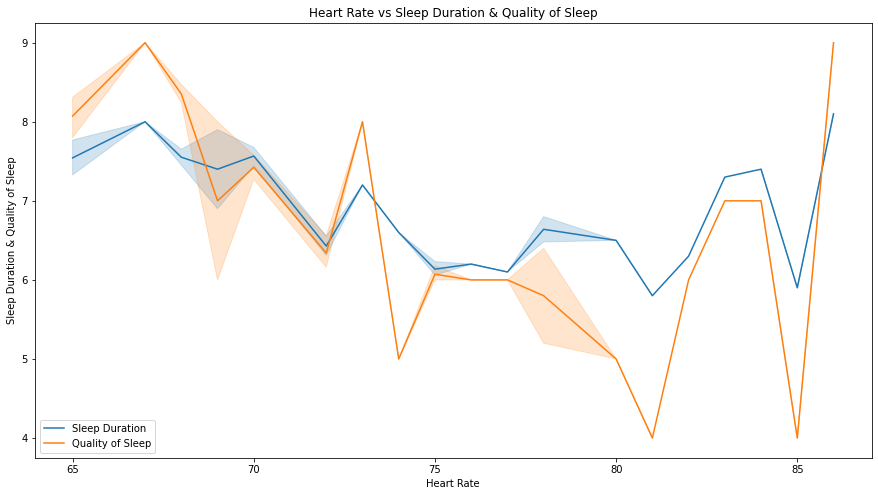

In [144]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['Heart Rate'],y=df['Sleep Duration'],label="Sleep Duration")
sns.lineplot(x=df['Heart Rate'],y=df['Quality of Sleep'], label="Quality of Sleep")
plt.ylabel('Sleep Duration & Quality of Sleep')
plt.xlabel('Heart Rate')
plt.title('Heart Rate vs Sleep Duration & Quality of Sleep')
plt.legend()
plt.show()

**INSIGHTS**
- people with lower heart rate have better Quality and Duration of sleep

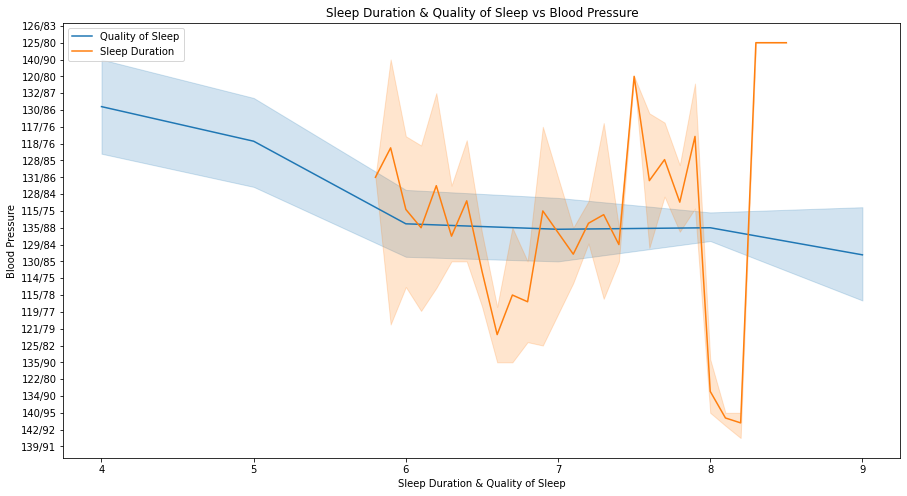

In [134]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['Quality of Sleep'],y=df['Blood Pressure'],label="Quality of Sleep")
sns.lineplot(x=df['Sleep Duration'],y=df['Blood Pressure'],label="Sleep Duration")
plt.ylabel('Blood Pressure')
plt.xlabel('Sleep Duration & Quality of Sleep')
plt.title('Sleep Duration & Quality of Sleep vs Blood Pressure')
plt.legend()
plt.show()

**INSIGHTS**
- As blood pressure decreases quality of sleep also gets better, indicating that people with normal level of Blood pressure sleep well
- we can't infer much about the duration of sleep as a relation to the blood pressure

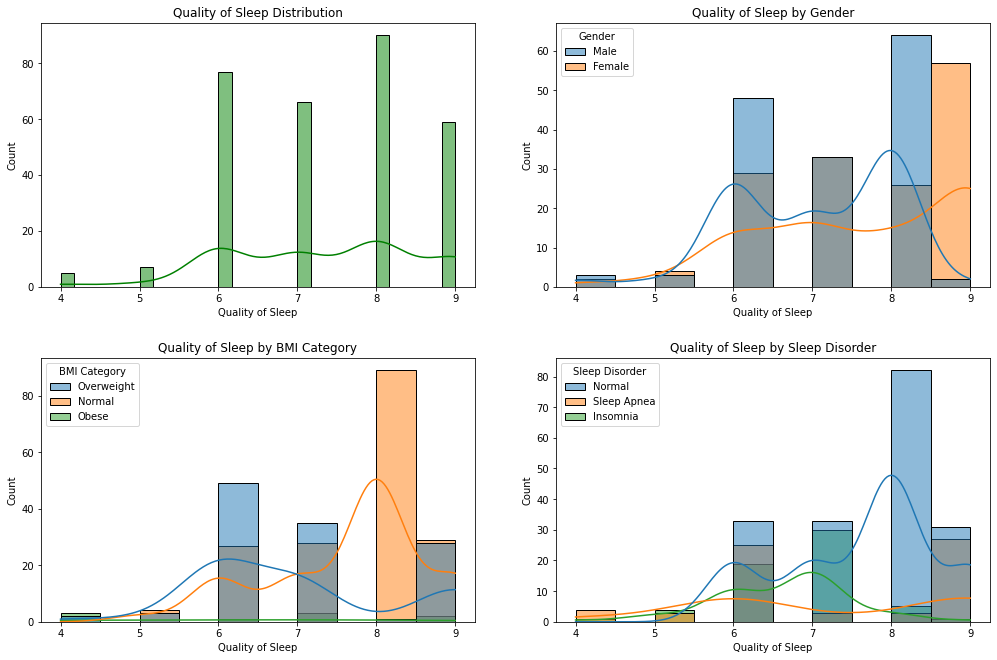

In [137]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout(pad=5.0)

sns.histplot(data=df, x='Quality of Sleep', bins=30, kde=True, color='g', ax=axs[0, 0])
axs[0, 0].set_title('Quality of Sleep Distribution')

sns.histplot(data=df, x='Quality of Sleep', kde=True, hue='Gender', ax=axs[0, 1])
axs[0, 1].set_title('Quality of Sleep by Gender')

sns.histplot(data=df, x='Quality of Sleep', kde=True, hue='BMI Category', ax=axs[1, 0])
axs[1, 0].set_title('Quality of Sleep by BMI Category')

sns.histplot(data=df, x='Quality of Sleep', kde=True, hue='Sleep Disorder', ax=axs[1, 1])
axs[1, 1].set_title('Quality of Sleep by Sleep Disorder')

plt.show()

**INSIGHTS**
- people in the normal weight category have the best Quality of sleep, followed by people who are overweight. Those who are obese have least quality of sleep.
- Sleep Apnea and Insomnial are more common with people who have lower quality of sleep

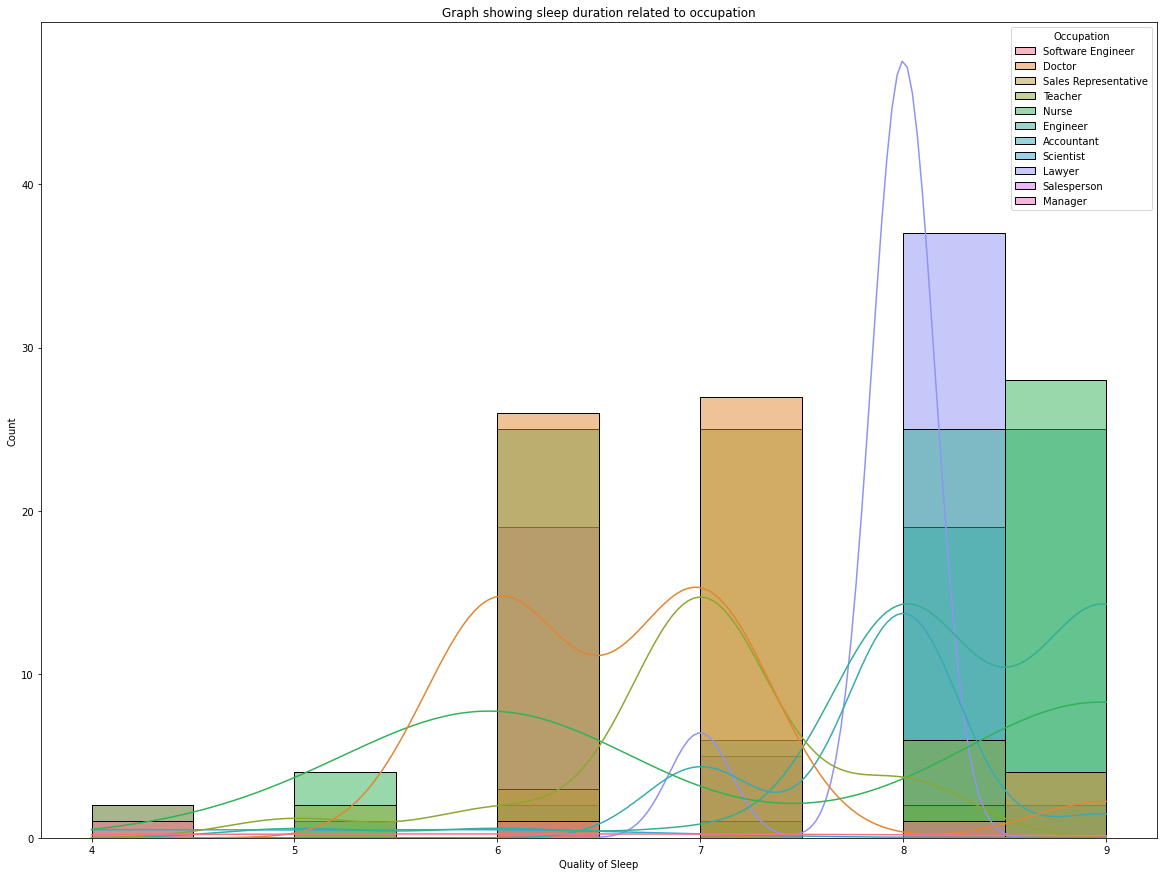

In [138]:
plt.figure(figsize=(20,15))
sns.histplot(data=df,x='Quality of Sleep',kde=True,hue='Occupation')
plt.title("Graph showing sleep duration related to occupation")
plt.show()

<ipython-input-143-a7784da76c2d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-143-a7784da76c2d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-143-a7784da76c2d>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


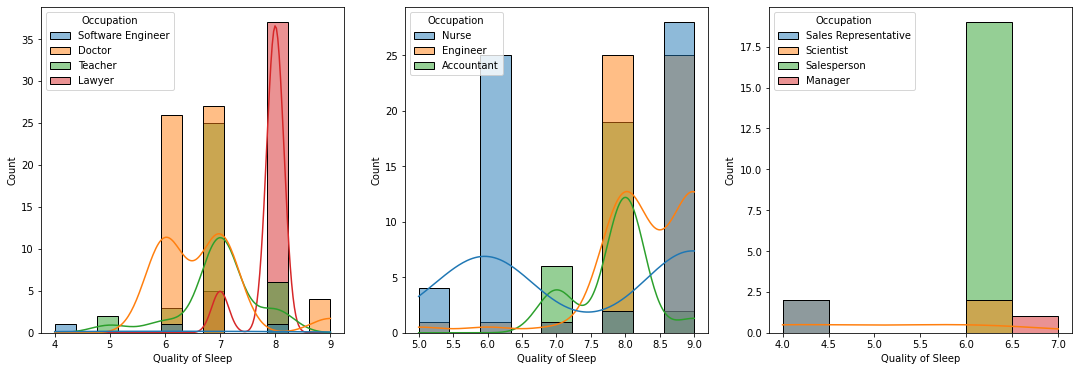

In [143]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df[(df.Occupation=='Teacher')|(df.Occupation=='Software Engineer')|(df.Occupation=='Doctor')|(df.Occupation=='Lawyer') ],x='Quality of Sleep',kde=True,hue='Occupation')
plt.subplot(142)
sns.histplot(data=df[(df.Occupation=='Accountant')|(df.Occupation=='Engineer')|(df.Occupation=='Nurse') ],x='Quality of Sleep',kde=True,hue='Occupation')
plt.subplot(143)
sns.histplot(data=df[(df.Occupation=='Sales Representative')|(df.Occupation=='Scientist')|(df.Occupation=='Manager')|(df.Occupation=='Salesperson')],x='Quality of Sleep',kde=True,hue='Occupation')
plt.show()

**INSIGHTS**
- Engineers, salesperson, Managers and Lawyers have the best quality of sleep
- Software Engineers, Scientists and Sales representatives have lower quality of sleep
- Nurses have both lower and higher quality of sleep which shows similarities to the pattern of their sleep duration
- Doctors inspite having a sleep duration in the two extremes, their sleep quality is around average